In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from multivae.data.datasets import CUB
import pandas as pd
import os

/home/clement/anaconda3/envs/multivae/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cub = CUB('../data/CUB/CUB_200_2011/', 'train', captions_per_image=10, im_size=(28, 28))

In [8]:
cub[0].data['text']

{'tokens': tensor([ 2, 32,  5, 29, 33, 18, 26, 34,  7, 18, 35,  0,  1,  1,  1,  1,  1,  1]),
 'padding_mask': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])}

In [4]:
len(cub.test_filenames.name)

5794

In [5]:
from torch.utils.data import DataLoader

dl = DataLoader(cub, 16)

In [6]:
out = next(iter(dl))
out.data['text'].keys()

dict_keys(['tokens', 'padding_mask'])

In [14]:
out.data['text']['tokens'][0]

tensor([36, 44, 10, 29, 33, 22, 44, 54, 14,  7, 22,  5, 26,  0,  1,  1,  1,  1])

In [16]:
out.data['text']['tokens_one_hot'][0][0][36]

tensor(1.)

In [42]:
out.data['text']['tokens'].shape

torch.Size([16, 18])

In [47]:
a = torch.zeros(16*18, cub.vocab_size)
a_one = a.scatter(1, out.data['text']['tokens'].reshape(-1, 1), 1)

In [48]:
a_one

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

In [51]:
out = cub[10].data["img"]
out.shape

AssertionError: (torch.Size([3, 64, 64]), 64)

In [10]:
import matplotlib.pyplot as plt

plt.imshow(torch.movedim(out.data["img"], 0, 2))

AttributeError: 'dict' object has no attribute 'data'

In [100]:
decode_sentence([int(e[0]) for e in out])

['this',
 'bird',
 'has',
 'head',
 'wings',
 'it',
 'white',
 'its',
 'bill',
 'and',
 'a',
 'long',
 'bill',
 'that',
 'and',
 'at',
 'its',
 'tip']

In [11]:
from multivae.models.nn.cub import CubTextEncoder, CubTextDecoderMLP
from multivae.models.jmvae import JMVAEConfig
from pythae.models.base import BaseAEConfig

config = JMVAEConfig(latent_dim=11)

In [12]:
encoder = CubTextEncoder(
    config,
    max_sentence_length=cub.max_words_in_captions,
    ntokens=cub.vocab_size,
    embed_size=512,
    ff_size=128
)#.cuda()

decoder = CubTextDecoderMLP(
    BaseAEConfig(latent_dim=11, input_dim=(cub.max_words_in_captions, cub.vocab_size))
)
#encoder

In [13]:
emb = encoder(input.data['text']).embedding

AttributeError: 'function' object has no attribute 'data'

In [168]:
rec = decoder(emb).reconstruction

In [164]:
torch.argmax(rec, dim=-1).shape

torch.Size([16, 18])

In [169]:
rec.shape

torch.Size([16, 18, 5451])

In [166]:
criterion = torch.nn.NLLLoss()

In [174]:
rec.argmax(dim=-1).shape

torch.Size([16, 18])

In [177]:
criterion(rec.view(-1, cub.vocab_size), input.data['text']['tokens'].view(-1))

tensor(8.6107, grad_fn=<NllLossBackward0>)

In [130]:
input.data['text']["padding_mask"].shape

torch.Size([16, 18, 1])

In [368]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 31.9 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.5 MB/s eta 0:00:00
  Using cached contourpy-1.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)


In [351]:
cub._load_bbox()

Total filenames:  11788 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg


{'001.Black_footed_Albatross/Black_Footed_Albatross_0046_18': [60,
  27,
  325,
  304],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0009_34': [139,
  30,
  153,
  264],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0002_55': [14,
  112,
  388,
  186],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0074_59': [112,
  90,
  255,
  242],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0014_89': [70,
  50,
  134,
  303],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0085_92': [33,
  53,
  251,
  395],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0031_100': [7,
  75,
  420,
  262],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103': [78,
  86,
  333,
  158],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097': [112,
  76,
  221,
  189],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057': [27,
  4,
  199,
  201],
 '001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059': [1,
  52,
  342,
  260],
 '001.Black_fo

In [344]:
cub.train_filenames.name[1]

'001.Black_footed_Albatross/Black_Footed_Albatross_0074_59'

In [341]:
len(cub.train_captions[cub.train_filenames.name[1]][0])

11

In [7]:
def decode_sentence(encoding):
    sentence = []
    for enc in encoding:
        sentence.append(cub.idxtoword[enc])

    return sentence

In [8]:
cub.train_captions

defaultdict(list,
            {'001.Black_footed_Albatross/Black_Footed_Albatross_0009_34': [[2,
               3,
               4,
               5,
               6,
               7,
               8,
               7,
               9,
               10,
               11,
               12,
               2,
               13,
               2,
               14,
               15,
               16,
               17,
               7,
               18,
               2,
               19,
               15,
               20,
               5,
               21,
               22,
               10,
               23,
               24,
               25,
               2,
               26,
               7,
               2,
               27],
              [28, 29, 21, 18, 30, 27, 21, 28, 7, 10, 31, 3],
              [2, 32, 5, 29, 33, 18, 26, 34, 7, 18, 35],
              [36,
               29,
               37,
               38,
               39,
               40,
 

In [9]:
import numpy as np
np.random.randint(0, 10)

1

In [10]:
decode_sentence(cub.train_captions[cub.train_filenames.name[1]][9])

['this',
 'bird',
 'has',
 'large',
 'wings',
 'with',
 'stripes',
 'on',
 'the',
 'ends',
 'a',
 'short',
 'tail',
 'a',
 'large',
 'gray',
 'and',
 'white',
 'head',
 'and',
 'a',
 'long',
 'beak',
 'with',
 'a',
 'downward',
 'curve']

In [46]:
from multivae.models import AutoModel


trained = AutoModel.load_from_folder('/home/clement/Documents/multimodal_vaes/examples/cub/dummy_output_dir/MVTCAE_training_2023-05-31_18-33-58/final_model')

In [47]:
from torch.utils.data import DataLoader

dl = DataLoader(cub, 16)
out = next(iter(dl))
out.data['text'].keys()

dict_keys(['tokens', 'padding_mask'])

In [48]:
out

DatasetOutput([('data',
                {'img': tensor([[[[ 0.6627,  0.6627,  0.6627,  ...,  0.6157,  0.6078,  0.6078],
                           [ 0.9294,  0.9373,  0.9294,  ...,  0.8745,  0.8667,  0.8588],
                           [ 0.9294,  0.9373,  0.9373,  ...,  0.8667,  0.8667,  0.8667],
                           ...,
                           [ 0.5373,  0.5765,  0.5608,  ...,  0.4824,  0.4510,  0.3961],
                           [ 0.5451,  0.6314,  0.6392,  ...,  0.4745,  0.3804,  0.4275],
                           [ 0.4353,  0.4667,  0.4510,  ...,  0.3412,  0.3255,  0.3255]],
                 
                          [[ 0.6549,  0.6549,  0.6549,  ...,  0.6157,  0.6157,  0.6078],
                           [ 0.9216,  0.9294,  0.9294,  ...,  0.8745,  0.8667,  0.8588],
                           [ 0.9294,  0.9294,  0.9294,  ...,  0.8745,  0.8667,  0.8588],
                           ...,
                           [ 0.5451,  0.5843,  0.5686,  ...,  0.4980,  0.4667,  0.411

In [49]:
enc_out = trained.encode(out)
dec_out = trained.decode(enc_out)

In [63]:
idx = 10
decode_sentence(dec_out.text[idx].softmax(dim=-1).argmax(dim=-1).numpy())

['this',
 'medium',
 'size',
 'bird',
 'with',
 'a',
 'black',
 'neck',
 'and',
 'a',
 'large',
 'beak',
 '<end>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

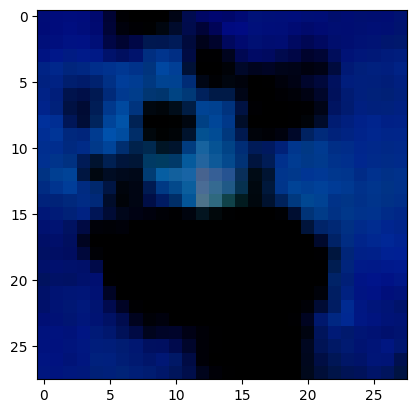

In [64]:
import matplotlib.pyplot as plt

plt.imshow(dec_out.img[idx].detach().movedim(0, 2))

In [30]:
dec_out.text[0].softmax(dim=-1).argmax(dim=-1)

tensor([36, 29, 15, 10, 21, 18,  7, 33, 22,  6, 81, 27,  0,  1,  1,  1,  1,  1])

In [324]:
for i in a:
    print(i)

b
c


In [325]:
len(cub.train_captions)

5994

In [88]:
files[1][10]

'001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065'

In [103]:
with open('../data/CUB/text/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.txt') as f:
    a = f.readlines()

In [107]:
cub.filenames[1][]

0        001.Black_footed_Albatross/Black_Footed_Albatr...
2        001.Black_footed_Albatross/Black_Footed_Albatr...
5        001.Black_footed_Albatross/Black_Footed_Albatr...
9        001.Black_footed_Albatross/Black_Footed_Albatr...
11       001.Black_footed_Albatross/Black_Footed_Albatr...
                               ...                        
11779    200.Common_Yellowthroat/Common_Yellowthroat_00...
11782    200.Common_Yellowthroat/Common_Yellowthroat_00...
11784    200.Common_Yellowthroat/Common_Yellowthroat_00...
11785    200.Common_Yellowthroat/Common_Yellowthroat_00...
11787    200.Common_Yellowthroat/Common_Yellowthroat_00...
Name: 1, Length: 5794, dtype: object